In [5]:
import os

import numpy as np
import pandas as pd

import json
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
timing_dir = '../eval_remote/analyze_outputs'
files = [os.path.abspath(os.path.join(timing_dir, f)) for f in os.listdir(timing_dir) if ('.json' in f) and any([(s in f) for s in ['row_copy', 'row_set', 'col_copy', 'col_set']])]
files

['/Users/udeshuk/Developer/mldb/eval_remote/analyze_outputs/opt_vec_row_copy_iris4_20000000.json',
 '/Users/udeshuk/Developer/mldb/eval_remote/analyze_outputs/opt_vec_col_set_iris4_5000000.json',
 '/Users/udeshuk/Developer/mldb/eval_remote/analyze_outputs/opt_vec_col_set_iris3_5000000.json',
 '/Users/udeshuk/Developer/mldb/eval_remote/analyze_outputs/opt_vec_col_copy_iris5_1000000.json',
 '/Users/udeshuk/Developer/mldb/eval_remote/analyze_outputs/opt_vec_row_set_iris4_20000000.json',
 '/Users/udeshuk/Developer/mldb/eval_remote/analyze_outputs/opt_vec_row_set_iris5_1000000.json',
 '/Users/udeshuk/Developer/mldb/eval_remote/analyze_outputs/opt_vec_row_set_iris3_20000000.json',
 '/Users/udeshuk/Developer/mldb/eval_remote/analyze_outputs/opt_vec_col_copy_iris5_20000000.json',
 '/Users/udeshuk/Developer/mldb/eval_remote/analyze_outputs/opt_vec_col_set_iris5_5000000.json',
 '/Users/udeshuk/Developer/mldb/eval_remote/analyze_outputs/opt_vec_col_set_iris5_20000000.json',
 '/Users/udeshuk/Devel

In [7]:
times_raw = {}

for file in files:
    with open(file, "r") as f:
        name = file.split("/")[-1].split(".")[0]
        workload = name.split("_")[-1]
        key = name.split("_iris")[0]
        run = name.split("_iris")[1][0]
        times_raw[key + "~" + workload + "~" + run] = json.loads(f.read())

In [8]:
times = []

for k, v in times_raw.items():
    t = {}
    t['dataset'] = 'iris'
    t['pipeline'] = k.split("~")[0][8:]
    t['workload'] = k.split("~")[1]
    t['run'] = k.split("~")[2]

    if t['run'] ==  '1':
        prediction = v['children'][0]['children'][0]['children'][0]
    else:
        prediction = v['children'][0]['children'][0]
        # if t['pipeline'] == 'opt_vec2':
        #     print(t['workload'])
        #     pprint(prediction)
    pred_info = prediction['extra_info'].split('|')[1:]
    for i in pred_info:
        kv = i.split(":")
        t[kv[0]] = kv[1]
    
    times.append(t)

In [9]:
times_df = pd.DataFrame.from_records(times).loc[:, ['pipeline', 'load', 'move', 'predict', 'move_rev']]
times_df = times_df.melt(id_vars=['pipeline'], value_vars=['load', 'move', 'predict', 'move_rev'], var_name='phase', value_name='time')
times_df['time'] = times_df['time'].astype(int)

([0, 1, 2, 3],
 [Text(0, 0, 'row_copy'),
  Text(1, 0, 'col_set'),
  Text(2, 0, 'col_copy'),
  Text(3, 0, 'row_set')])

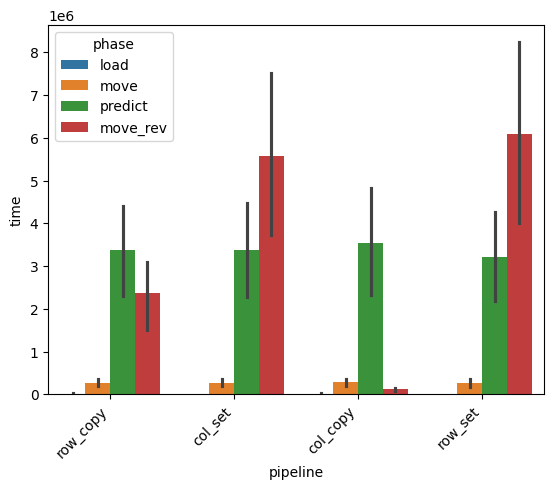

In [10]:
sns.barplot(times_df, x="pipeline", y="time", hue="phase")
plt.xticks(rotation=45, ha='right')